<a href="https://colab.research.google.com/github/smjimenez97/diagnostica/blob/master/Diagnostica_Regresion_logistica_binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lógística binomial


## Carga de datos

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df_data = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Cambiar total_charges a numeric

In [ ]:
df_data.TotalCharges = pd.to_numeric(df_data.EstimatedSalary, errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


## Manejo de datos nulos

In [ ]:
df_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df_data.dropna(inplace=True)

In [ ]:
df_data.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Eliminar id

In [ ]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_data.drop('User ID',axis=1,inplace=True)

In [ ]:
df_data.head(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Convertir a numérico variable objetivo

In [ ]:
df_data['Gender'].replace(to_replace='Male', value = 1, inplace=True)
df_data['Gender'].replace(to_replace='Female', value = 0, inplace=True)

In [ ]:
df_data['Age']

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

In [ ]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [ ]:
df_data_processing

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


## Analisis de correlación

In [ ]:
import matplotlib.pyplot as plt

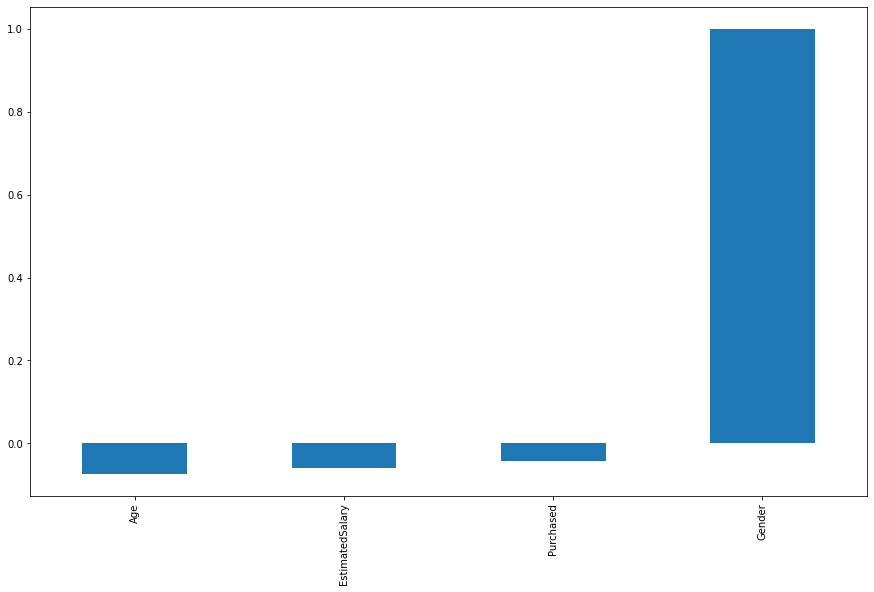

In [ ]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Gender'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [ ]:
df_data_processing_scaled

array([[1.        , 0.02380952, 0.02962963, 0.        ],
       [1.        , 0.4047619 , 0.03703704, 0.        ],
       [0.        , 0.19047619, 0.20740741, 0.        ],
       ...,
       [0.        , 0.76190476, 0.03703704, 1.        ],
       [1.        , 0.42857143, 0.13333333, 0.        ],
       [0.        , 0.73809524, 0.15555556, 1.        ]])

In [ ]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [ ]:
df_data_processing_scaled.columns = df_data_processing.columns

In [ ]:
df_data_processing_scaled.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1.0,0.023810,0.029630,0.0
1,1.0,0.404762,0.037037,0.0
2,0.0,0.190476,0.207407,0.0
3,0.0,0.214286,0.311111,0.0
4,1.0,0.023810,0.451852,0.0


## Análisis exploratorio de datos

In [ ]:
import seaborn as sns

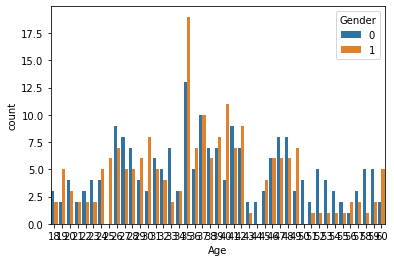

In [ ]:
sns.countplot(data=df_data, x='Age',hue='Gender')
plt.show()

In [ ]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Gender')
    plt.show()

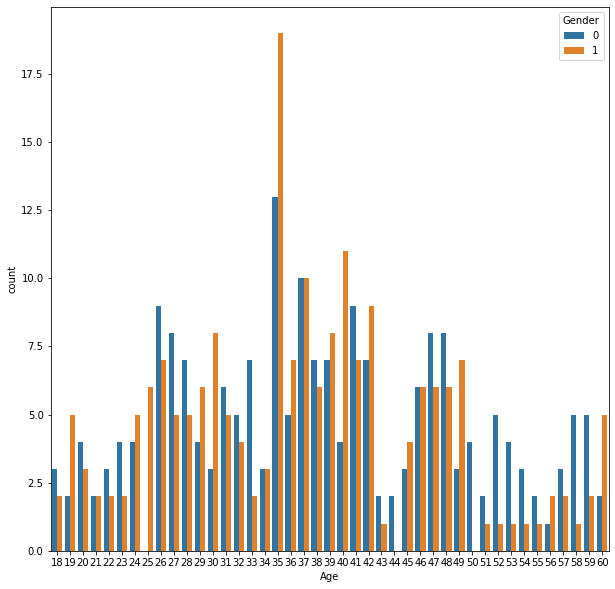

In [ ]:
plot_categorial('Age')

In [ ]:
column_cat = df_data.select_dtypes(include='object').columns

In [ ]:
for _ in column_cat:
    plot_categorial(_)

<Figure size 720x720 with 0 Axes>

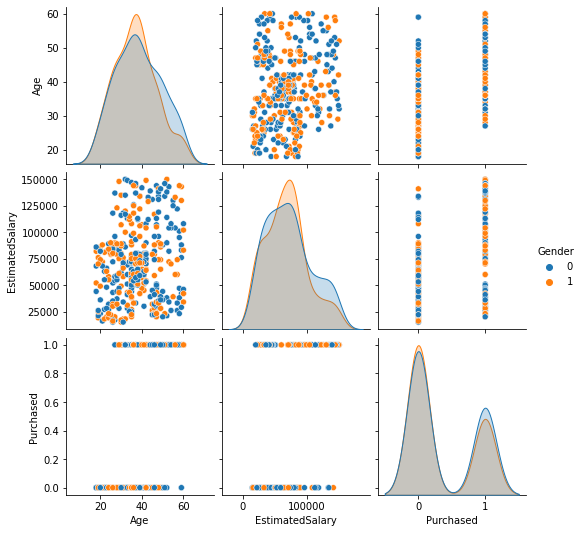

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Gender')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [ ]:
X = df_data_processing_scaled.drop('Gender',axis=1)
y = df_data_processing_scaled['Gender'].values

In [ ]:
y

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(280, 3)

In [ ]:
X_test.shape

(120, 3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.5416666666666666


## Evaluación del modelo

In [ ]:
model.predict_proba(X_test)

array([[0.51572838, 0.48427162],
       [0.5637194 , 0.4362806 ],
       [0.48006161, 0.51993839],
       [0.54005346, 0.45994654],
       [0.4762907 , 0.5237093 ],
       [0.49198584, 0.50801416],
       [0.54187027, 0.45812973],
       [0.49771234, 0.50228766],
       [0.5216271 , 0.4783729 ],
       [0.52264462, 0.47735538],
       [0.50544834, 0.49455166],
       [0.52823531, 0.47176469],
       [0.46935475, 0.53064525],
       [0.45233986, 0.54766014],
       [0.50173034, 0.49826966],
       [0.52219568, 0.47780432],
       [0.52733852, 0.47266148],
       [0.53594147, 0.46405853],
       [0.50631783, 0.49368217],
       [0.54564929, 0.45435071],
       [0.4587654 , 0.5412346 ],
       [0.49654295, 0.50345705],
       [0.50922368, 0.49077632],
       [0.55911232, 0.44088768],
       [0.44836147, 0.55163853],
       [0.51905068, 0.48094932],
       [0.52847638, 0.47152362],
       [0.50568821, 0.49431179],
       [0.5682272 , 0.4317728 ],
       [0.4491329 , 0.5508671 ],
       [0.

In [ ]:
model.coef_

array([[-0.41307753, -0.21049604,  0.03742979]])

In [ ]:
model.feature_names_in_

array(['Age', 'EstimatedSalary', 'Purchased'], dtype=object)

AxesSubplot(0.125,0.125;0.775x0.755)


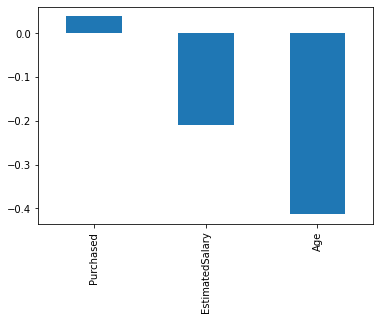

In [ ]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


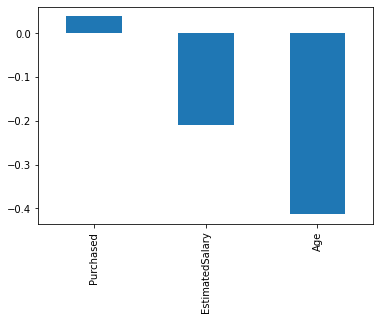

In [ ]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

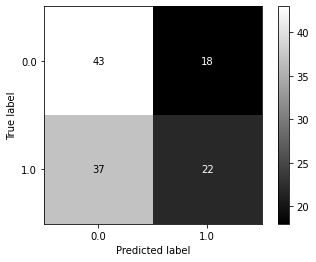

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()